In [ ]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import io
from google.colab import files
sns.set_style("whitegrid")
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go 

In [ ]:
uploaded = files.upload()

Saving data_ebitda3.xlsx to data_ebitda3.xlsx


In [ ]:
df = pd.read_excel(io.BytesIO(uploaded['data_ebitda3.xlsx']))
df

,Unnamed: 0,01-2016,02-2016,03-2016,04-2016,05-2016,06-2016,07-2016,08-2016,09-2016,10-2016,11-2016,12-2016,01-2017,02-2017,03-2017,04-2017,05-2017,06-2017,07-2017,08-2017,09-2017,10-2017,11-2017,12-2017,01-2018,02-2018,03-2018,04-2018,05-2018,06-2018,07-2018,08-2018,09-2018,10-2018,11-2018,12-2018,01-2019,02-2019,03-2019,04-2019,05-2019,06-2019,07-2019,08-2019,09-2019,10-2019,11-2019,12-2019,01-2020,02-2020,03-2020,04-2020,05-2020,06-2020,07-2020,08-2020,09-2020,10-2020,11-2020,12-2020,01-2021,02-2021,03-2021,04-2021
0,Hotel,92261.180204,71652.459665,82218.545266,82267.407633,64418.259843,52140.309034,59663.130752,50213.554877,45904.047487,63502.246162,61749.143445,82124.540798,84870.7971,79968.9898,87772.7678,95544.4485,86373.1290,63657.5349,66033.3774,58389.4607,59.7321,45289.8044,76355.3548,85486.0808,98400.0000,84495.0000,98031.0000,88754.7400,72259.0000,59735.0000,67704.0000,60754.0000,46976.0000,52838.0000,78676.0000,92257.0000,104771.9138,91285.0000,91163.5611,87759.0000,85719.1715,58206.5368,62141.9068,59031.7830,48363.9993,60683.4339,80926.3027,103755.0676,113395.0000,104433.7098,65495.0000,0.0000,49.00,0.00,35913.4543,38013.0000,39342.6191,44014.00,69305.0000,87386.0000,110458,93728,110005,112969
1,Food,75081.284922,67013.831684,68057.925466,49679.356863,46240.111203,33465.136188,46165.384882,39543.360143,25388.768833,33864.526204,42377.303536,54322.077042,75474.7112,69452.5570,80619.1447,71352.8085,59509.5640,49497.5779,62167.5542,58282.2779,7.0338,40742.5029,68174.2069,84437.6603,107355.0000,97160.0000,95795.0000,73048.0000,53252.0000,40701.0000,52166.0000,43530.0000,35193.0000,38152.0000,53649.0000,83858.0000,95996.4627,72575.2753,80120.9538,67156.9008,42948.1016,32133.3959,36129.0000,31140.0000,31342.0000,42656.0000,55175.0000,82681.0000,85066.0000,66189.0000,36934.0000,0.0000,0.00,0.00,27492.0000,42478.0000,50981.0000,53606.00,85291.0000,103440.0000,109899,82154,93455,93862
2,Beverage,60255.705116,51465.260916,54043.365802,45048.526943,39537.548435,28231.290287,35442.969702,29825.799132,21692.815971,28440.166755,35157.579517,46618.658053,62579.7766,60089.7026,69793.8840,62309.2254,54224.2101,44279.6958,52285.8225,47615.4061,16.1008,33337.5289,59017.3152,70988.0215,92415.0000,86488.0000,83357.0000,61453.0000,45320.0000,32727.0000,41740.0000,34004.0000,28974.1654,30396.0000,44730.0000,67033.6688,73857.7790,60554.2451,61248.2907,51393.8039,35065.1524,23678.3785,26570.0000,21314.0000,24356.0000,30621.0000,45549.0000,65173.0000,67595.0000,52723.0000,27752.0000,0.0000,0.00,0.00,24850.0000,34892.0000,40425.0000,42545.00,65634.0000,81777.0000,88392,69236,78145,77948
3,F&B,135336.990000,118479.092600,122101.291300,94727.883810,85777.659640,61696.426480,81608.354580,69369.159270,47081.584800,62304.692960,77534.883050,100940.735100,138054.4878,129542.2596,150413.0287,133662.0339,113733.7741,93777.2737,114453.3767,105897.6840,23.1346,74080.0318,127191.5221,155425.6818,199770.0000,183648.0000,179152.0000,134501.0000,98572.0000,73428.0000,93906.0000,77534.0000,64167.1654,68548.0000,98379.0000,150891.6688,169854.2417,133129.5204,141369.2445,118550.7047,78013.2540,55811.7744,62699.0000,52454.0000,55698.0000,73277.0000,100724.0000,147854.0000,152661.0000,118912.0000,64686.0000,0.0000,0.00,0.00,52342.0000,77370.0000,91406.0000,96151.00,150925.0000,185217.0000,198291,151390,171600,171810
4,Spa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,347.6250,168.7738,0.0000,90.0383,288.7844,78.6404,1325.0000,1984.0000,1434.0000,584.0000,1462.0000,502.0000,1798.0000,2120.0000,1208.0000,1384.0000,943.0000,1080.0746,956.5620,2437.3532,776.8598,881.4959,1350.9187,1698.3593,1946.7784,1143.0000,1307.0000,1485.8736,2042.0370,1797.7522,2101.0000,2686.0000,1035.0000,0.0000,0.00,0.00,1698.0000,3409.0000,1514.0000,1710.00,2207.0000,2684.0000,2048,3138,3442,4444
5,TOTAL REVENUE,227598.170200,190131.552300,204319.836500,176995.291400,150195.919500,113

In [ ]:
df.rename(columns={'Unnamed: 0':'Dates',}, inplace=True)
df.head()

,Dates,01-2016,02-2016,03-2016,04-2016,05-2016,06-2016,07-2016,08-2016,09-2016,10-2016,11-2016,12-2016,01-2017,02-2017,03-2017,04-2017,05-2017,06-2017,07-2017,08-2017,09-2017,10-2017,11-2017,12-2017,01-2018,02-2018,03-2018,04-2018,05-2018,06-2018,07-2018,08-2018,09-2018,10-2018,11-2018,12-2018,01-2019,02-2019,03-2019,04-2019,05-2019,06-2019,07-2019,08-2019,09-2019,10-2019,11-2019,12-2019,01-2020,02-2020,03-2020,04-2020,05-2020,06-2020,07-2020,08-2020,09-2020,10-2020,11-2020,12-2020,01-2021,02-2021,03-2021,04-2021
0,Hotel,92261.180204,71652.459665,82218.545266,82267.407633,64418.259843,52140.309034,59663.130752,50213.554877,45904.047487,63502.246162,61749.143445,82124.540798,84870.7971,79968.9898,87772.7678,95544.4485,86373.1290,63657.5349,66033.3774,58389.4607,59.7321,45289.8044,76355.3548,85486.0808,98400.0,84495.0,98031.0,88754.74,72259.0,59735.0,67704.0,60754.0,46976.0000,52838.0,78676.0,92257.0000,104771.9138,91285.0000,91163.5611,87759.0000,85719.1715,58206.5368,62141.9068,59031.783,48363.9993,60683.4339,80926.3027,103755.0676,113395.0,104433.7098,65495.0,0.0,49.0,0.0,35913.4543,38013.0,39342.6191,44014.0,69305.0,87386.0,110458,93728,110005,112969
1,Food,75081.284922,67013.831684,68057.925466,49679.356863,46240.111203,33465.136188,46165.384882,39543.360143,25388.768833,33864.526204,42377.303536,54322.077042,75474.7112,69452.5570,80619.1447,71352.8085,59509.5640,49497.5779,62167.5542,58282.2779,7.0338,40742.5029,68174.2069,84437.6603,107355.0,97160.0,95795.0,73048.00,53252.0,40701.0,52166.0,43530.0,35193.0000,38152.0,53649.0,83858.0000,95996.4627,72575.2753,80120.9538,67156.9008,42948.1016,32133.3959,36129.0000,31140.000,31342.0000,42656.0000,55175.0000,82681.0000,85066.0,66189.0000,36934.0,0.0,0.0,0.0,27492.0000,42478.0,50981.0000,53606.0,85291.0,103440.0,109899,82154,93455,93862
2,Beverage,60255.705116,51465.260916,54043.365802,45048.526943,39537.548435,28231.290287,35442.969702,29825.799132,21692.815971,28440.166755,35157.579517,46618.658053,62579.7766,60089.7026,69793.8840,62309.2254,54224.2101,44279.6958,52285.8225,47615.4061,16.1008,33337.5289,59017.3152,70988.0215,92415.0,86488.0,83357.0,61453.00,45320.0,32727.0,41740.0,34004.0,28974.1654,30396.0,44730.0,67033.6688,73857.7790,60554.2451,61248.2907,51393.8039,35065.1524,23678.3785,26570.0000,21314.000,24356.0000,30621.0000,45549.0000,65173.0000,67595.0,52723.0000,27752.0,0.0,0.0,0.0,24850.0000,34892.0,40425.0000,42545.0,65634.0,81777.0,88392,69236,78145,77948
3,F&B,135336.990000,118479.092600,122101.291300,94727.883810,85777.659640,61696.426480,81608.354580,69369.159270,47081.584800,62304.692960,77534.883050,100940.735100,138054.4878,129542.2596,150413.0287,133662.0339,113733.7741,93777.2737,114453.3767,105897.6840,23.1346,74080.0318,127191.5221,155425.6818,199770.0,183648.0,179152.0,134501.00,98572.0,73428.0,93906.0,77534.0,64167.1654,68548.0,98379.0,150891.6688,169854.2417,133129.5204,141369.2445,118550.7047,78013.2540,55811.7744,62699.0000,52454.000,55698.0000,73277.0000,100724.0000,147854.0000,152661.0,118912.0000,64686.0,0.0,0.0,0.0,52342.0000,77370.0,91406.0000,96151.0,150925.0,185217.0,198291,151390,171600,171810
4,Spa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,347.6250,168.7738,0.0000,90.0383,288.7844,78.6404,1325.0,1984.0,1434.0,584.00,1462.0,502.0,1798.0,2120.0,1208.0000,1384.0,943.0,1080.0746,956.5620,2437.3532,776.8598,881.4959,1350.9187,1698.3593,1946.7784,1143.000,1307.0000,1485.8736,2042.0370,1797.7522,2101.0,2686.0000,1035.0,0.0,0.0,0.0,1698.0000,3409.0,1514.0000,1710.0,2207.0,2684.0,2048,3138,3442,4444


In [ ]:
df.set_index('Dates', inplace=True)
df.head()

,01-2016,02-2016,03-2016,04-2016,05-2016,06-2016,07-2016,08-2016,09-2016,10-2016,11-2016,12-2016,01-2017,02-2017,03-2017,04-2017,05-2017,06-2017,07-2017,08-2017,09-2017,10-2017,11-2017,12-2017,01-2018,02-2018,03-2018,04-2018,05-2018,06-2018,07-2018,08-2018,09-2018,10-2018,11-2018,12-2018,01-2019,02-2019,03-2019,04-2019,05-2019,06-2019,07-2019,08-2019,09-2019,10-2019,11-2019,12-2019,01-2020,02-2020,03-2020,04-2020,05-2020,06-2020,07-2020,08-2020,09-2020,10-2020,11-2020,12-2020,01-2021,02-2021,03-2021,04-2021
Dates,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Hotel,92261.180204,71652.459665,82218.545266,82267.407633,64418.259843,52140.309034,59663.130752,50213.554877,45904.047487,63502.246162,61749.143445,82124.540798,84870.7971,79968.9898,87772.7678,95544.4485,86373.1290,63657.5349,66033.3774,58389.4607,59.7321,45289.8044,76355.3548,85486.0808,98400.0,84495.0,98031.0,88754.74,72259.0,59735.0,67704.0,60754.0,46976.0000,52838.0,78676.0,92257.0000,104771.9138,91285.0000,91163.5611,87759.0000,85719.1715,58206.5368,62141.9068,59031.783,48363.9993,60683.4339,80926.3027,103755.0676,113395.0,104433.7098,65495.0,0.0,49.0,0.0,35913.4543,38013.0,39342.6191,44014.0,69305.0,87386.0,110458,93728,110005,112969
Food,75081.284922,67013.831684,68057.925466,49679.356863,46240.111203,33465.136188,46165.384882,39543.360143,25388.768833,33864.526204,42377.303536,54322.077042,75474.7112,69452.5570,80619.1447,71352.8085,59509.5640,49497.5779,62167.5542,58282.2779,7.0338,40742.5029,68174.2069,84437.6603,107355.0,97160.0,95795.0,73048.00,53252.0,40701.0,52166.0,43530.0,35193.0000,38152.0,53649.0,83858.0000,95996.4627,72575.2753,80120.9538,67156.9008,42948.1016,32133.3959,36129.0000,31140.000,31342.0000,42656.0000,55175.0000,82681.0000,85066.0,66189.0000,36934.0,0.0,0.0,0.0,27492.0000,42478.0,50981.0000,53606.0,85291.0,103440.0,109899,82154,93455,93862
Beverage,60255.705116,51465.260916,54043.365802,45048.526943,39537.548435,28231.290287,35442.969702,29825.799132,21692.815971,28440.166755,35157.579517,46618.658053,62579.7766,60089.7026,69793.8840,62309.2254,54224.2101,44279.6958,52285.8225,47615.4061,16.1008,33337.5289,59017.3152,70988.0215,92415.0,86488.0,83357.0,61453.00,45320.0,32727.0,41740.0,34004.0,28974.1654,30396.0,44730.0,67033.6688,73857.7790,60554.2451,61248.2907,51393.8039,35065.1524,23678.3785,26570.0000,21314.000,24356.0000,30621.0000,45549.0000,65173.0000,67595.0,52723.0000,27752.0,0.0,0.0,0.0,24850.0000,34892.0,40425.0000,42545.0,65634.0,81777.0,88392,69236,78145,77948
F&B,135336.990000,118479.092600,122101.291300,94727.883810,85777.659640,61696.426480,81608.354580,69369.159270,47081.584800,62304.692960,77534.883050,100940.735100,138054.4878,129542.2596,150413.0287,133662.0339,113733.7741,93777.2737,114453.3767,105897.6840,23.1346,74080.0318,127191.5221,155425.6818,199770.0,183648.0,179152.0,134501.00,98572.0,73428.0,93906.0,77534.0,64167.1654,68548.0,98379.0,150891.6688,169854.2417,133129.5204,141369.2445,118550.7047,78013.2540,55811.7744,62699.0000,52454.000,55698.0000,73277.0000,100724.0000,147854.0000,152661.0,118912.0000,64686.0,0.0,0.0,0.0,52342.0000,77370.0,91406.0000,96151.0,150925.0,185217.0,198291,151390,171600,171810
Spa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,347.6250,168.7738,0.0000,90.0383,288.7844,78.6404,1325.0,1984.0,1434.0,584.00,1462.0,502.0,1798.0,2120.0,1208.0000,1384.0,943.0,1080.0746,956.5620,2437.3532,776.8598,881.4959,1350.9187,1698.3593,1946.7784,1143.000,1307.0000,1485.8736,2042.0370,1797.7522,2101.0,2686.0000,1035.0,0.0,0.0,0.0,1698.0000,3409.0,1514.0000,1710.0,2207.0,2684.0,2048,3138,3442,4444


In [ ]:
df = df.transpose()
df.head()

Dates,Hotel,Food,Beverage,F&B,Spa,TOTAL REVENUE,COS (gross),Operation Exp.,Fixed Exp.,Op Exp. + Op. Fixed Exp.,Corporate Expenses,Ebitda (conversion rate)
01-2016,92261.180204,75081.284922,60255.705116,135336.99000,0.0,227598.1702,35498.871005,0.0,0.0,90952.0,0.0,101147.511981
02-2016,71652.459665,67013.831684,51465.260916,118479.09260,0.0,190131.5523,32004.993231,0.0,0.0,92950.0,0.0,65176.852916
03-2016,82218.545266,68057.925466,54043.365802,122101.29130,0.0,204319.8365,33577.743298,0.0,0.0,96491.0,0.0,74251.048211
04-2016,82267.407633,49679.356863,45048.526943,94727.88381,0.0,176995.2914,27772.245171,0.0,0.0,96904.0,0.0,52318.700007
05-2016,64418.259843,46240.111203,39537.548435,85777.65964,0.0,150195.9195,27132.957779,0.0,0.0,95536.0,0.0,27527.099200


In [ ]:
df.index = pd.to_datetime(df.index)

In [ ]:
df.rename(columns={'Ebitda (conversion rate)':'EBITDA','TOTAL REVENUE':'REVENUE',
                   'Op Exp. + Op. Fixed Exp.':'Op+Fix_Exp','Corporate Expenses':'CorpExp','Operation Exp.':'OpExp',
                   'Fixed Exp.':'FixExp'}, inplace=True)
df.head(20)

Dates,Hotel,Food,Beverage,F&B,Spa,REVENUE,COS (gross),OpExp,FixExp,Op+Fix_Exp,CorpExp,EBITDA
2016-01-01,92261.180204,75081.284922,60255.705116,135336.99000,0.0000,227598.17020,35498.871005,0.0,0.0,90952.0,0.0,101147.511981
2016-02-01,71652.459665,67013.831684,51465.260916,118479.09260,0.0000,190131.55230,32004.993231,0.0,0.0,92950.0,0.0,65176.852916
2016-03-01,82218.545266,68057.925466,54043.365802,122101.29130,0.0000,204319.83650,33577.743298,0.0,0.0,96491.0,0.0,74251.048211
2016-04-01,82267.407633,49679.356863,45048.526943,94727.88381,0.0000,176995.29140,27772.245171,0.0,0.0,96904.0,0.0,52318.700007
2016-05-01,64418.259843,46240.111203,39537.548435,85777.65964,0.0000,150195.91950,27132.957779,0.0,0.0,95536.0,0.0,27527.099200
2016-06-01,52140.309034,33465.136188,28231.290287,61696.42648,0.0000,113836.73550,21122.735084,0.0,0.0,89220.0,0.0,3493.932529
2016-07-01,59663.130752,46165.384882,35442.969702,81608.35458,0.0000,141271.48530,25026.665141,0.0,0.0,91375.0,0.0,24869.329211
2016-08-01,50213.554877,39543.360143,29825.799132,69369.15927,0.0000,119582.71420,25742.755195,0.0,0.0,85008.0,0.0,8831.796656
2016-09-01,45904.047487,25388.768833,21692.815971,47081.58480,0.0000,92985.63229,16058.133250,0.0,0.0,86719.0,0.0,-9791.144870
2016-10-01,63502.246162,33864.526204,28440.166755,62304.69296,0.0000,125806.93910,18123.644786,0.0,0.0,93228.0,0.0,14455.188989


In [ ]:
df['Date'] = df.index
df.head()

Dates,Hotel,Food,Beverage,F&B,Spa,REVENUE,COS (gross),OpExp,FixExp,Op+Fix_Exp,CorpExp,EBITDA,Date
2016-01-01,92261.180204,75081.284922,60255.705116,135336.99000,0.0,227598.1702,35498.871005,0.0,0.0,90952.0,0.0,101147.511981,2016-01-01
2016-02-01,71652.459665,67013.831684,51465.260916,118479.09260,0.0,190131.5523,32004.993231,0.0,0.0,92950.0,0.0,65176.852916,2016-02-01
2016-03-01,82218.545266,68057.925466,54043.365802,122101.29130,0.0,204319.8365,33577.743298,0.0,0.0,96491.0,0.0,74251.048211,2016-03-01
2016-04-01,82267.407633,49679.356863,45048.526943,94727.88381,0.0,176995.2914,27772.245171,0.0,0.0,96904.0,0.0,52318.700007,2016-04-01
2016-05-01,64418.259843,46240.111203,39537.548435,85777.65964,0.0,150195.9195,27132.957779,0.0,0.0,95536.0,0.0,27527.099200,2016-05-01


In [ ]:
df.to_csv('Ebitda_Clean.csv')

In [ ]:
income = df[['Hotel','Food','Beverage','Spa','REVENUE','EBITDA']]
income.describe()

Dates,Hotel,Food,Beverage,Spa,REVENUE,EBITDA
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,70267.351596,57432.449318,47066.075936,1042.780103,175808.656953,46969.470445
std,27050.779775,26491.638741,22180.497664,1082.206817,73975.670203,48176.130970
min,0.000000,0.000000,0.000000,0.000000,0.000000,-63478.588200
25%,58343.729725,40411.590036,30564.750000,0.000000,126542.498675,13049.340906
50%,71955.729832,53985.538521,45434.500000,949.781000,177496.645700,45199.101300
75%,88018.260850,76636.271850,62376.863200,1731.938050,228000.248250,91168.809725
max,113395.000000,109899.000000,92415.000000,4444.000000,310797.000000,139931.000000


<bound method Series.sum of 2016-01-01    101147.511981
2016-02-01     65176.852916
2016-03-01     74251.048211
2016-04-01     52318.700007
2016-05-01     27527.099200
                  ...      
2020-12-01    101832.000000
2021-01-01    139931.000000
2021-02-01    100543.000000
2021-03-01    119123.000000
2021-04-01    116601.000000
Name: EBITDA, Length: 64, dtype: float64>

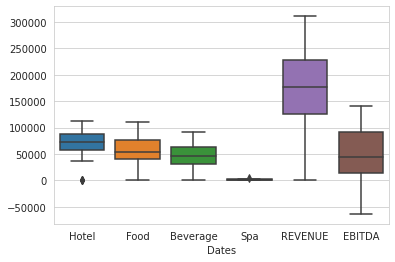

In [ ]:
sns.boxplot(data=income)

In [ ]:
df_corr = df.corr()
df_corr

Dates,Hotel,Food,Beverage,F&B,Spa,REVENUE,COS (gross),OpExp,FixExp,Op+Fix_Exp,CorpExp,EBITDA
Dates,,,,,,,,,,,,
Hotel,1.000000,0.884259,0.877254,0.882593,0.344882,0.950413,0.857017,0.350032,0.217659,0.677415,0.301658,0.894137
Food,0.884259,1.000000,0.993037,0.998553,0.377236,0.984727,0.950214,0.366958,0.221593,0.617394,0.288836,0.945732
Beverage,0.877254,0.993037,1.000000,0.997935,0.350113,0.981363,0.940240,0.325437,0.169175,0.623758,0.249718,0.948964
F&B,0.882593,0.998553,0.997935,1.000000,0.365507,0.984896,0.947306,0.348639,0.198048,0.621368,0.271478,0.948845
Spa,0.344882,0.377236,0.350113,0.365507,1.000000,0.380812,0.546304,0.749050,0.785124,-0.085376,0.710490,0.310916
REVENUE,0.950413,0.984727,0.981363,0.984896,0.380812,1.000000,0.943579,0.367945,0.221157,0.654584,0.299012,0.954720
COS (gross),0.857017,0.950214,0.940240,0.947306,0.546304,0.943579,1.000000,0.472984,0.359927,0.564088,0.407815,0.861966
OpExp,0.350032,0.366958,0.325437,0.348639,0.749050,0.367945,0.472984,1.000000,0.933178,-0.021193,0.946805,0.238753
FixExp,0.217659,0.221593,0.169175,0.198048,0.785124,0.221157,0.359927,0.933178,1.000000,-0.228717,0.918938,0.130210


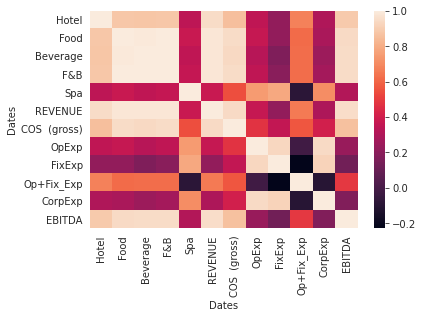

In [ ]:
sns.heatmap(data=df_corr)
plt.show()

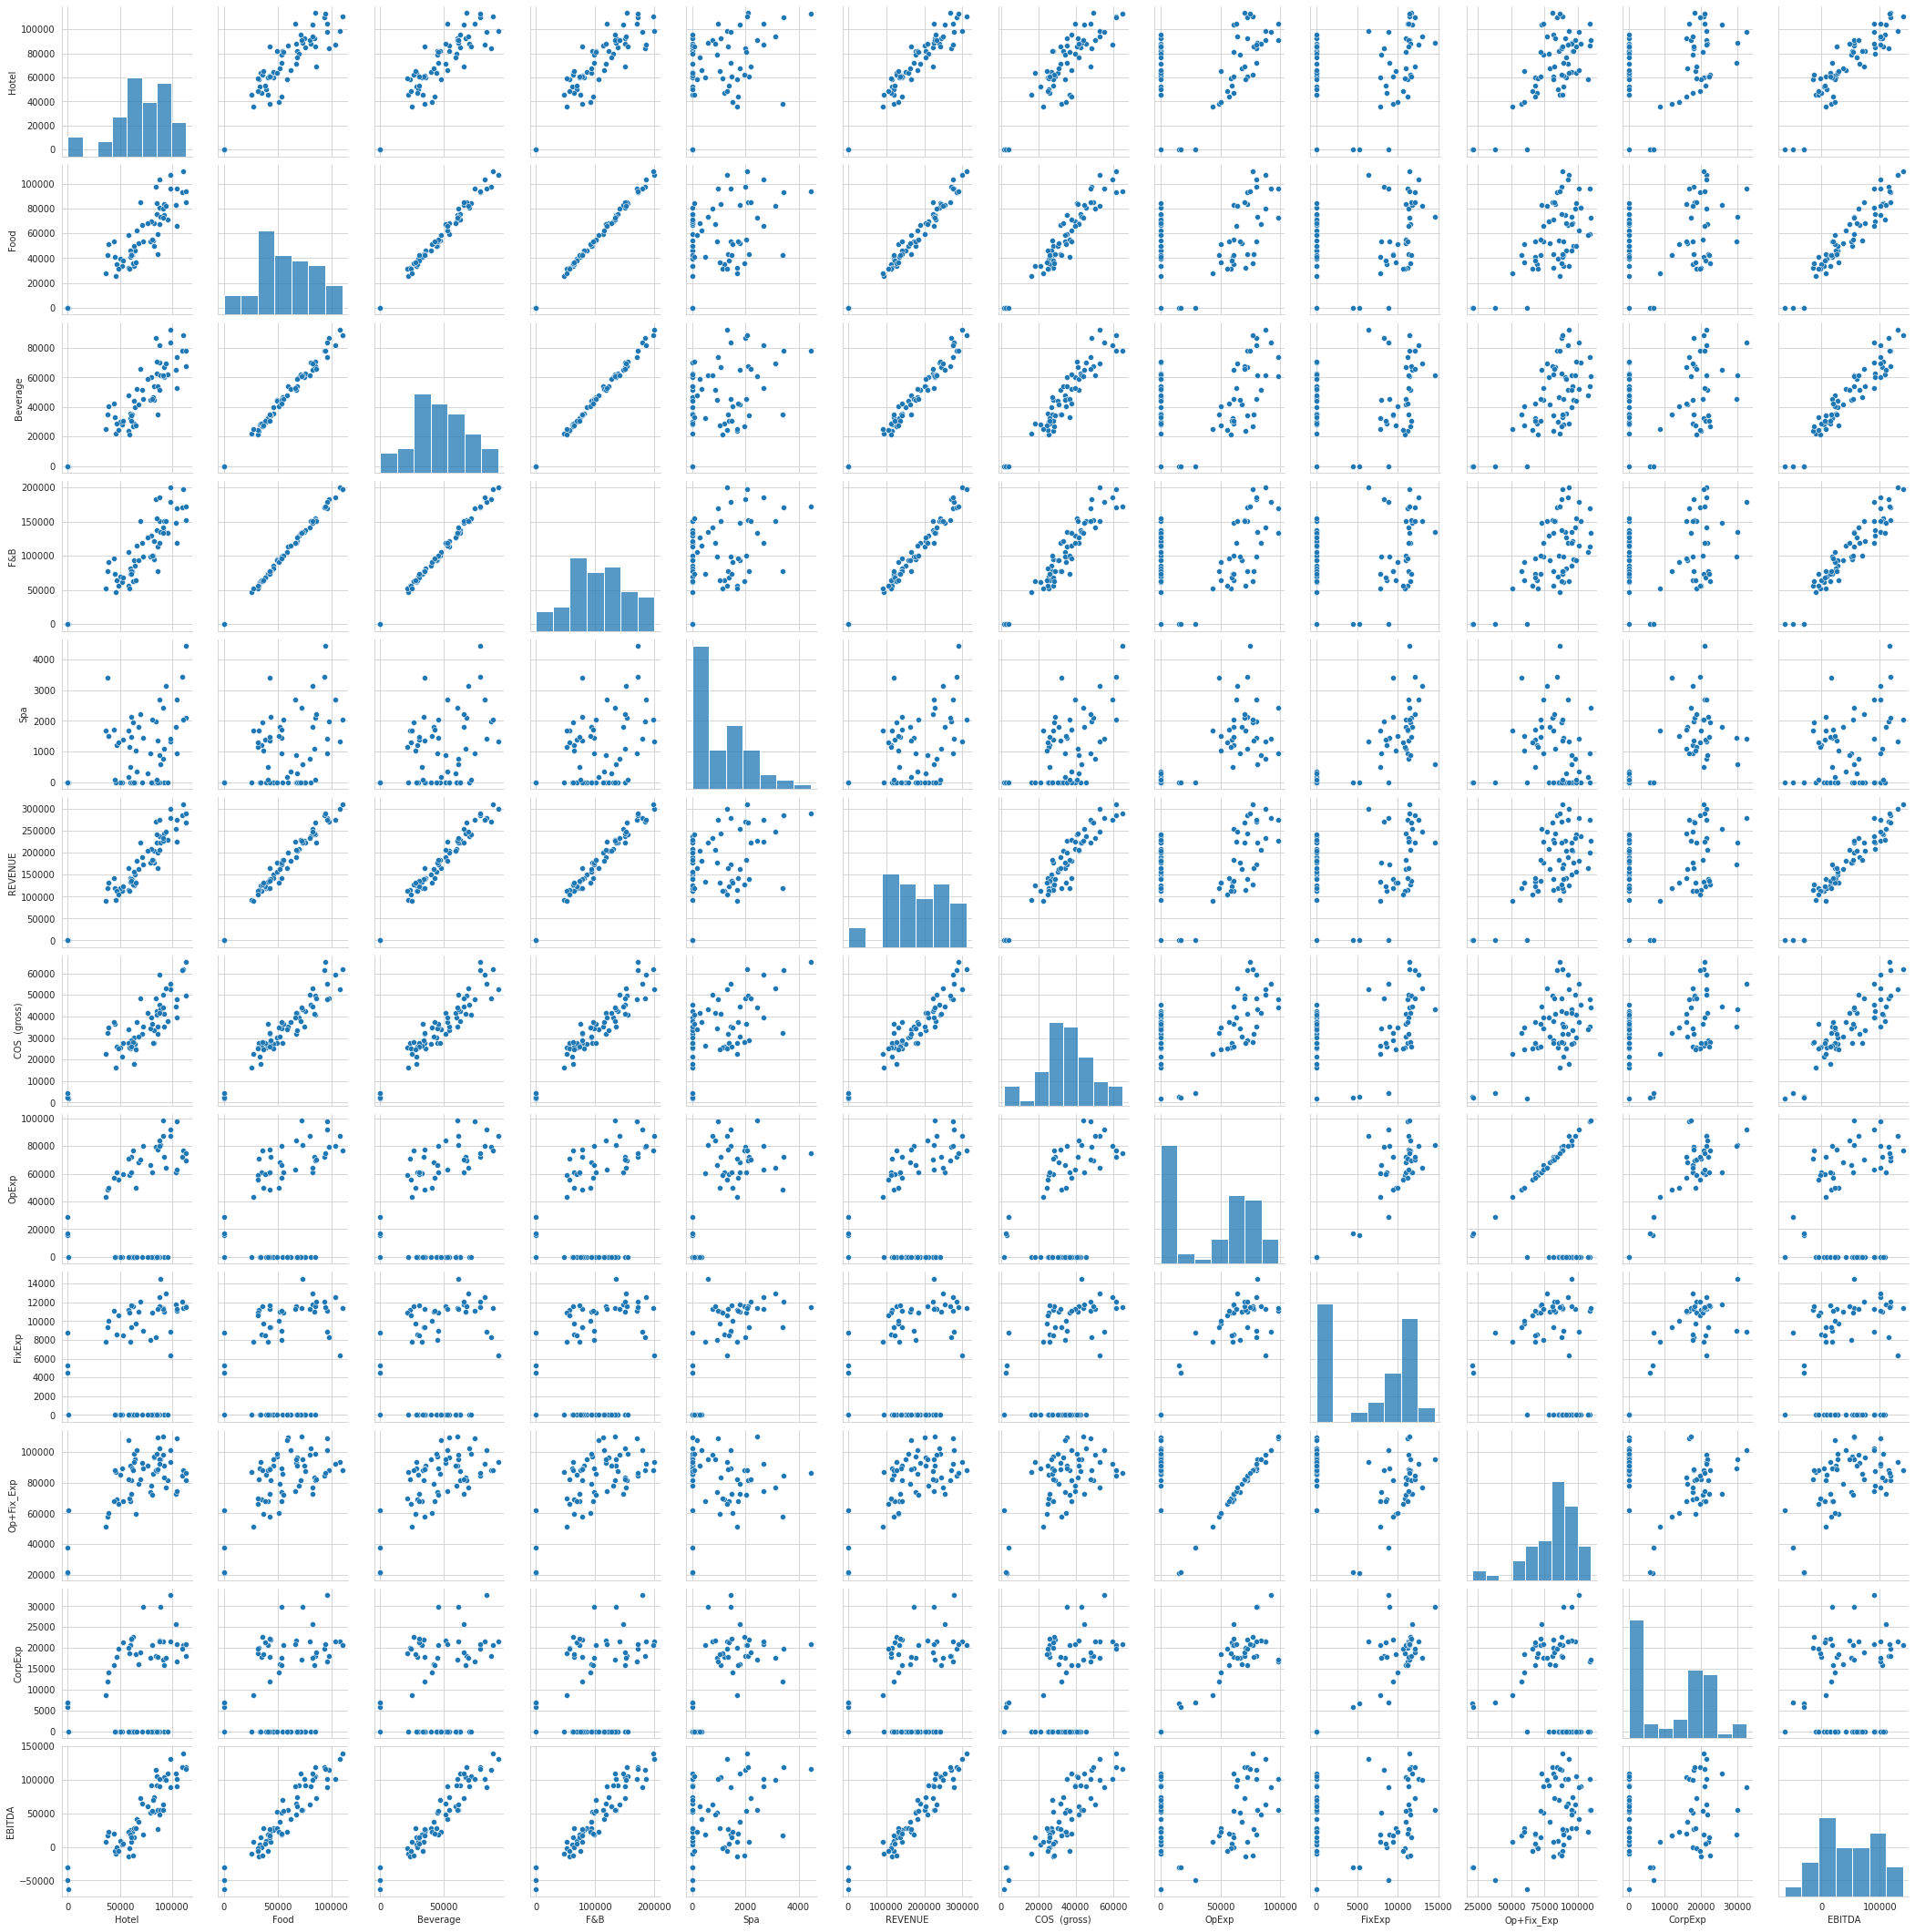

In [ ]:
sns.pairplot(data=df)

In [ ]:
income_corr = income.corr()
income_corr

Dates,Hotel,Food,Beverage,Spa,REVENUE,EBITDA
Dates,,,,,,
Hotel,1.000000,0.884259,0.877254,0.344882,0.950413,0.894137
Food,0.884259,1.000000,0.993037,0.377236,0.984727,0.945732
Beverage,0.877254,0.993037,1.000000,0.350113,0.981363,0.948964
Spa,0.344882,0.377236,0.350113,1.000000,0.380812,0.310916
REVENUE,0.950413,0.984727,0.981363,0.380812,1.000000,0.954720
EBITDA,0.894137,0.945732,0.948964,0.310916,0.954720,1.000000


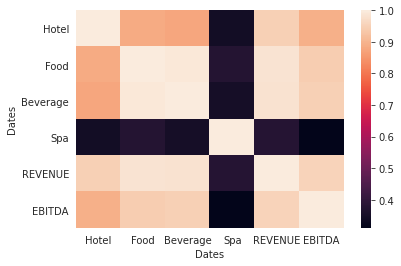

In [ ]:
sns.heatmap(data=income_corr)

In [ ]:
df.columns

Index(['Hotel', 'Food', 'Beverage', 'F&B', 'Spa', 'REVENUE', 'COS  (gross)',
       'OpExp', 'FixExp', 'Op+Fix_Exp', 'CorpExp', 'EBITDA'],
      dtype='object', name='Dates')

In [ ]:
expenses = df[['COS  (gross)','OpExp','FixExp','Op+Fix_Exp','CorpExp','EBITDA']]
expenses.head()

Dates,COS (gross),OpExp,FixExp,Op+Fix_Exp,CorpExp,EBITDA
2016-01-01,35498.871005,0.0,0.0,90952.0,0.0,101147.511981
2016-02-01,32004.993231,0.0,0.0,92950.0,0.0,65176.852916
2016-03-01,33577.743298,0.0,0.0,96491.0,0.0,74251.048211
2016-04-01,27772.245171,0.0,0.0,96904.0,0.0,52318.700007
2016-05-01,27132.957779,0.0,0.0,95536.0,0.0,27527.099200


In [ ]:
expenses.describe()

Dates,COS (gross),OpExp,FixExp,Op+Fix_Exp,CorpExp,EBITDA
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,34717.943613,41439.887258,6387.950123,82223.696756,11810.796875,46969.470445
std,13766.035915,35502.940758,5246.185805,18230.920734,10239.546024,48176.130970
min,1794.987400,0.000000,0.000000,20948.860600,0.000000,-63478.588200
25%,26912.718334,0.000000,0.000000,72866.388450,0.000000,13049.340906
50%,34751.443650,56248.405600,8547.188850,86603.000000,16015.500000,45199.101300
75%,42788.233075,72260.065250,11206.921275,93348.785775,20644.000000,91168.809725
max,65184.000000,98528.936000,14534.096000,109952.669200,32695.000000,139931.000000


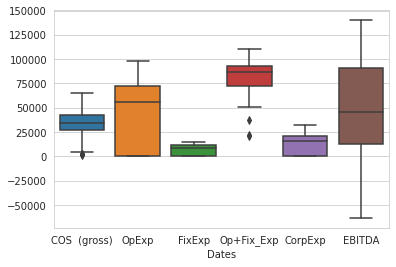

In [ ]:
sns.boxplot(data=expenses)
plt.show()

In [ ]:
cos_19 = df.loc['2019-01-01':'2019-12-31','COS  (gross)']
rev_19 = df.loc['2019-01-01':'2019-12-31','REVENUE']
fb_19 = df.loc['2019-01-01':'2019-12-31','F&B']

In [ ]:
cos_18 = df.loc['2018-01-01':'2018-12-31','COS  (gross)']
rev_18 = df.loc['2018-01-01':'2018-12-31','REVENUE']
fb_18 = df.loc['2018-01-01':'2018-12-31','F&B']

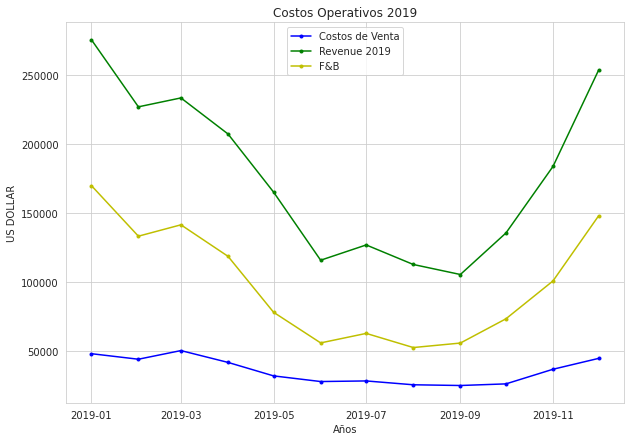

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Costos Operativos 2019')

plt.xlabel('Años')
plt.ylabel('US DOLLAR')
plt.plot(cos_19, 'b.-', label='Costos de Venta')
plt.plot(rev_19, 'g.-', label='Revenue 2019')
plt.plot(fb_19, 'y.-', label='F&B')
plt.legend()
plt.show()

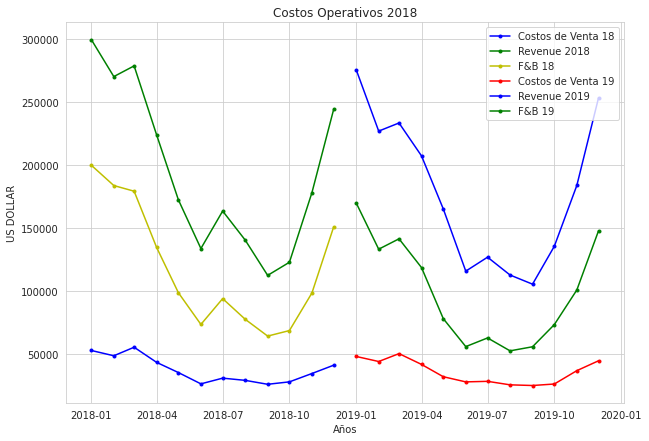

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Costos Operativos 2018')

plt.xlabel('Años')
plt.ylabel('US DOLLAR')
plt.plot(cos_18, 'b.-', label='Costos de Venta 18')
plt.plot(rev_18, 'g.-', label='Revenue 2018')
plt.plot(fb_18, 'y.-', label='F&B 18')
plt.plot(cos_19, 'r.-', label='Costos de Venta 19')
plt.plot(rev_19, 'b.-', label='Revenue 2019')
plt.plot(fb_19, 'g.-', label='F&B 19')
plt.legend()
plt.show()

In [ ]:
cos_19

2019-01-01    47998.0000
2019-02-01    43987.3193
2019-03-01    50243.8169
2019-04-01    41685.3566
2019-05-01    31913.6672
2019-06-01    27818.0870
2019-07-01    28253.9026
2019-08-01    25473.0000
2019-09-01    24946.0000
2019-10-01    26124.0695
2019-11-01    36723.9296
2019-12-01    44588.3302
Name: COS  (gross), dtype: float64

In [ ]:
exp_corr = expenses.corr()
exp_corr

Dates,COS (gross),OpExp,FixExp,Op+Fix_Exp,CorpExp,EBITDA
Dates,,,,,,
COS (gross),1.000000,0.472984,0.359927,0.564088,0.407815,0.861966
OpExp,0.472984,1.000000,0.933178,-0.021193,0.946805,0.238753
FixExp,0.359927,0.933178,1.000000,-0.228717,0.918938,0.130210
Op+Fix_Exp,0.564088,-0.021193,-0.228717,1.000000,-0.102481,0.487018
CorpExp,0.407815,0.946805,0.918938,-0.102481,1.000000,0.170956
EBITDA,0.861966,0.238753,0.130210,0.487018,0.170956,1.000000


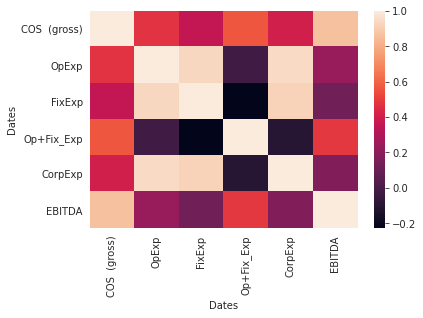

In [ ]:
sns.heatmap(data=exp_corr)

In [ ]:
df['SMA'] = df['EBITDA'].rolling(10, center=True).mean()
df['SMA_Coss'] = df['COS  (gross)'].rolling(10, center=True).mean()
df.head(20)

Dates,Hotel,Food,Beverage,F&B,Spa,REVENUE,COS (gross),OpExp,FixExp,Op+Fix_Exp,CorpExp,EBITDA,SMA,SMA_Coss
2016-01-01,92261.180204,75081.284922,60255.705116,135336.99000,0.0000,227598.17020,35498.871005,0.0,0.0,90952.0,0.0,101147.511981,NaN,NaN
2016-02-01,71652.459665,67013.831684,51465.260916,118479.09260,0.0000,190131.55230,32004.993231,0.0,0.0,92950.0,0.0,65176.852916,NaN,NaN
2016-03-01,82218.545266,68057.925466,54043.365802,122101.29130,0.0000,204319.83650,33577.743298,0.0,0.0,96491.0,0.0,74251.048211,NaN,NaN
2016-04-01,82267.407633,49679.356863,45048.526943,94727.88381,0.0000,176995.29140,27772.245171,0.0,0.0,96904.0,0.0,52318.700007,NaN,NaN
2016-05-01,64418.259843,46240.111203,39537.548435,85777.65964,0.0000,150195.91950,27132.957779,0.0,0.0,95536.0,0.0,27527.099200,NaN,NaN
2016-06-01,52140.309034,33465.136188,28231.290287,61696.42648,0.0000,113836.73550,21122.735084,0.0,0.0,89220.0,0.0,3493.932529,36228.031483,26206.074394
2016-07-01,59663.130752,46165.384882,35442.969702,81608.35458,0.0000,141271.48530,25026.665141,0.0,0.0,91375.0,0.0,24869.329211,28338.031191,25421.165033
2016-08-01,50213.554877,39543.360143,29825.799132,69369.15927,0.0000,119582.71420,25742.755195,0.0,0.0,85008.0,0.0,8831.796656,28787.270798,24977.781418
2016-09-01,45904.047487,25388.768833,21692.815971,47081.58480,0.0000,92985.63229,16058.133250,0.0,0.0,86719.0,0.0,-9791.144870,30618.630877,25881.671498
2016-10-01,63502.246162,33864.526204,28440.166755,62304.69296,0.0000,125806.93910,18123.644786,0.0,0.0,93228.0,0.0,14455.188989,34569.584766,27066.523801


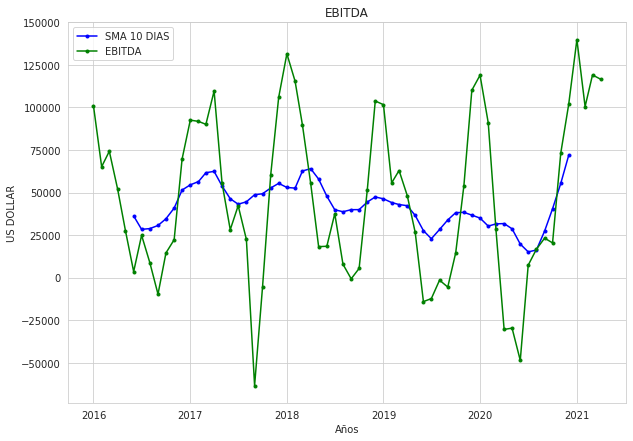

In [ ]:
plt.figure(figsize=(10,7))
plt.title('EBITDA')

plt.xlabel('Años')
plt.ylabel('US DOLLAR')
plt.plot(df.SMA, 'b.-', label='SMA 10 DIAS')
plt.plot(df.EBITDA, 'g.-', label='EBITDA')
plt.legend()
plt.show()

In [ ]:
df['SMA'].describe()

count       55.000000
mean     41980.637189
std      12607.134207
min      15099.100000
25%      32812.900000
50%      40826.710636
75%      52012.891427
max      71863.400000
Name: SMA, dtype: float64

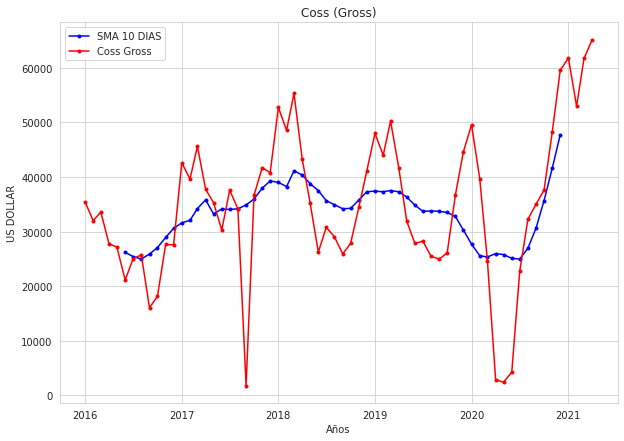

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Coss (Gross)')

plt.xlabel('Años')
plt.ylabel('US DOLLAR')
plt.plot(df.SMA_Coss, 'b.-', label='SMA 10 DIAS')
plt.plot(df['COS  (gross)'], 'r.-', label='Coss Gross')
plt.legend()
plt.show()

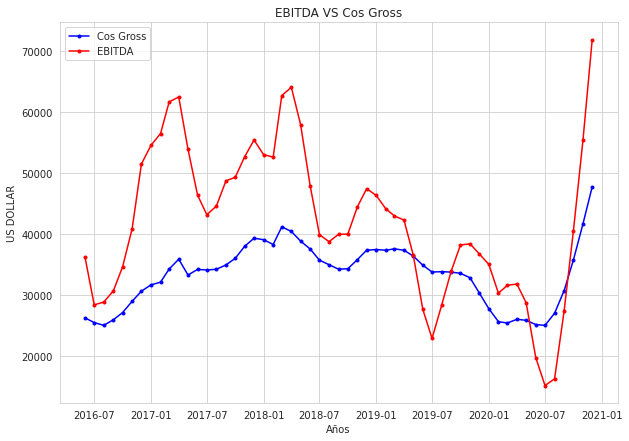

In [ ]:
plt.figure(figsize=(10,7))
plt.title('EBITDA VS Cos Gross')

plt.xlabel('Años')
plt.ylabel('US DOLLAR')
plt.plot(df.SMA_Coss, 'b.-', label='Cos Gross')
plt.plot(df.SMA, 'r.-', label='EBITDA')
plt.legend()
plt.show()

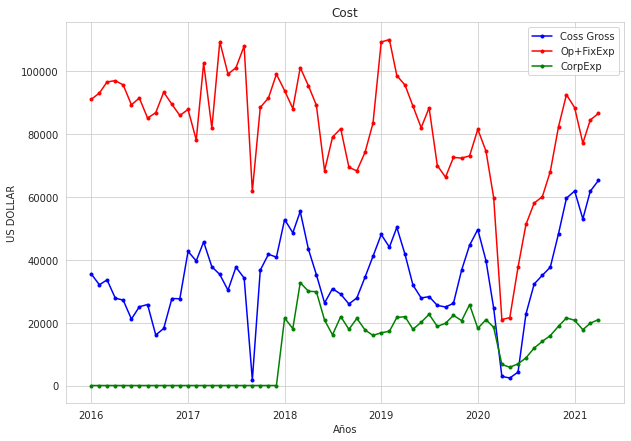

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Cost')

plt.xlabel('Años')
plt.ylabel('US DOLLAR')
plt.plot(df['COS  (gross)'], 'b.-', label='Coss Gross')
plt.plot(df['Op+Fix_Exp'], 'r.-', label='Op+FixExp')
plt.plot(df['CorpExp'], 'g.-', label='CorpExp')
plt.legend()
plt.show()

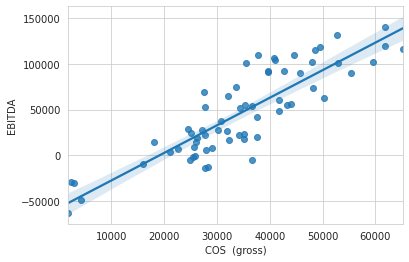

In [ ]:
sns.regplot(y='EBITDA', x='COS  (gross)', data=df)

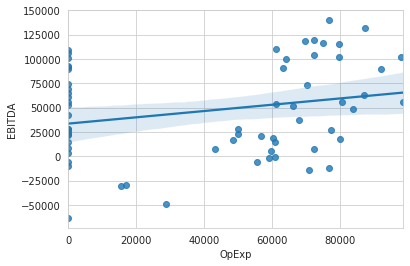

In [ ]:
sns.regplot(y='EBITDA', x='OpExp', data=df)

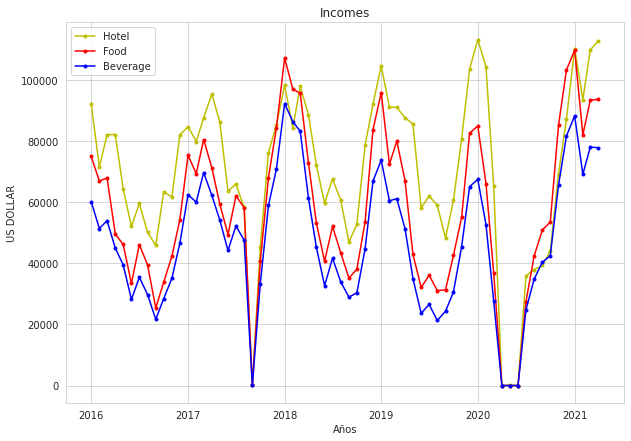

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Incomes')

plt.xlabel('Años')
plt.ylabel('US DOLLAR')
plt.plot(df['Hotel'], 'y.-', label='Hotel')
plt.plot(df['Food'], 'r.-', label='Food')
plt.plot(df['Beverage'], 'b.-', label='Beverage')
plt.legend()
plt.show()

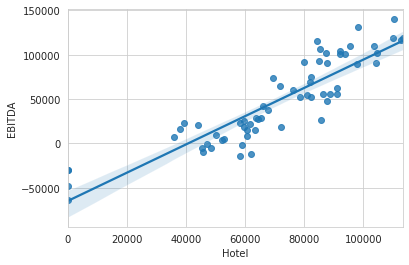

In [ ]:
sns.regplot(y='EBITDA', x='Hotel', data=df)
plt.show()

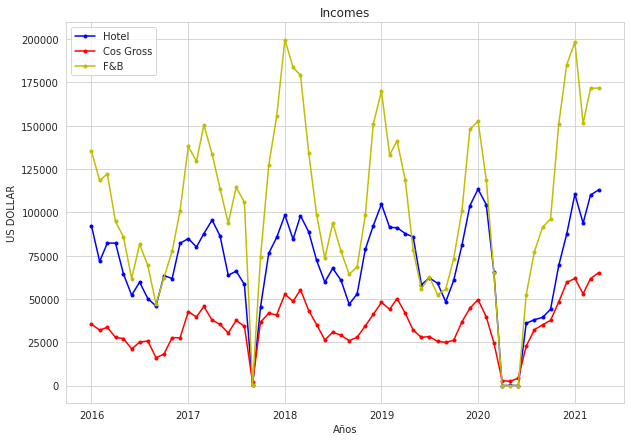

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Incomes')

plt.xlabel('Años')
plt.ylabel('US DOLLAR')
plt.plot(df['Hotel'], 'b.-', label='Hotel')
plt.plot(df['COS  (gross)'], 'r.-', label='Cos Gross')
plt.plot(df['F&B'], 'y.-', label='F&B')
plt.legend()
plt.show()